# Checkpoint Five: Modeling Data

With your visualizations ready to go, the final step in your project is to do some predictive analysis on your dataset. You will be using linear regression for your model. You will not be penalized if your linear regression model does not work out. You just need to build the model and make notes as to the results.

Link to my dataset:

## Prepare Your Dataframe

Import any libraries you need and create a dataframe.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set(font_scale=1.5)

#
df = pd.read_csv("C:\\Users\\19739\\Documents\\DataAnalysis_LaunchCode\\checkpoint-five\\CleanedClimateData.csv")

df.describe()

,Temperature,CO2_Emissions,Sea_Level_Rise,Precipitation,Humidity,Wind_Speed,Month
count,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000,10237.000000
mean,14.941298,400.199099,-0.002328,49.894602,49.787448,25.054818,6.522321
std,5.026639,49.708975,0.990980,28.872092,28.975428,14.453984,3.450031
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732,1.000000
25%,11.583778,367.129854,-0.671601,24.496064,24.635689,12.544312,4.000000
50%,14.976462,400.838390,0.003836,49.821026,49.694829,24.819398,7.000000
75%,18.305764,433.271511,0.678108,74.581874,75.306185,37.636347,10.000000
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664,12.000000


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10237 non-null  object 
 1   Location        10237 non-null  object 
 2   Country         10237 non-null  object 
 3   Temperature     10237 non-null  float64
 4   CO2_Emissions   10237 non-null  float64
 5   Sea_Level_Rise  10237 non-null  float64
 6   Precipitation   10237 non-null  float64
 7   Humidity        10237 non-null  float64
 8   Wind_Speed      10237 non-null  float64
 9   DateBins        10237 non-null  object 
 10  Continent       10237 non-null  object 
 11  Month           10237 non-null  int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 959.8+ KB


In [33]:
#we already know from the tableau exploration that some of the data is wonky, so I am checking the location data by looking at the cities in a country I am familiar with

selected_country = 'Israel'

# Create a list of unique locations for the selected country
locations_in_country = df.loc[df['Country'] == selected_country, 'Location'].unique()

# Print the list of locations
print(locations_in_country)

#I am deeply familiar with the towns and cities in Israel and can assure you, this list is nonsense. These aren't real places.
#we can safely assume the Location column should be dropped

['Adrianshire' 'Hutchinsonburgh' 'Lawsonmouth' 'North Sandra' 'Mayhaven'
 'Samanthashire' 'Rodriguezberg' 'North Dana' 'Erinbury' 'North Elizabeth'
 'Michaelstad' 'South Michaelland' 'New Alexanderfurt' 'Drakemouth'
 'Cookton' 'New Matthew' 'Lindsaymouth' 'North Anthony' 'Walterhaven'
 'Gloverton' 'Stephaniechester' 'Michaelhaven' 'Port Michaelport'
 'South Michael' 'New Sabrina' 'South Morganland' 'Mistyburgh'
 'Robertbury' 'New Teresa' 'Samanthafurt' 'New Pamelamouth'
 'Lake Dianastad' 'Brockberg' 'New Kimberlychester' 'Ericside']


In [34]:
df = df.drop(['Location'], axis = 1)
#dropping the Location column, keeping counry and continent

## Find Correlations

Use either pairplot or a heatmap or both to find the two variables with the strongest correlation in your dataset.

In [14]:
df[['Temperature', 'CO2_Emissions']].corr()

,Temperature,CO2_Emissions
Temperature,1.000000,-0.000186
CO2_Emissions,-0.000186,1.000000


In [15]:
df[['Precipitation', 'CO2_Emissions']].corr()

,Precipitation,CO2_Emissions
Precipitation,1.000000,-0.004892
CO2_Emissions,-0.004892,1.000000


In [16]:
df[['Humidity', 'CO2_Emissions']].corr()

,Humidity,CO2_Emissions
Humidity,1.000000,-0.001402
CO2_Emissions,-0.001402,1.000000


In [17]:
df[['Wind_Speed', 'CO2_Emissions']].corr()

,Wind_Speed,CO2_Emissions
Wind_Speed,1.000000,-0.004579
CO2_Emissions,-0.004579,1.000000


In [18]:
df[['Sea_Level_Rise', 'CO2_Emissions']].corr()

,Sea_Level_Rise,CO2_Emissions
Sea_Level_Rise,1.000000,-0.004408
CO2_Emissions,-0.004408,1.000000


In [19]:
#all of these show very weak correllations, even when they should not. this indicates that there is something wrong with the data

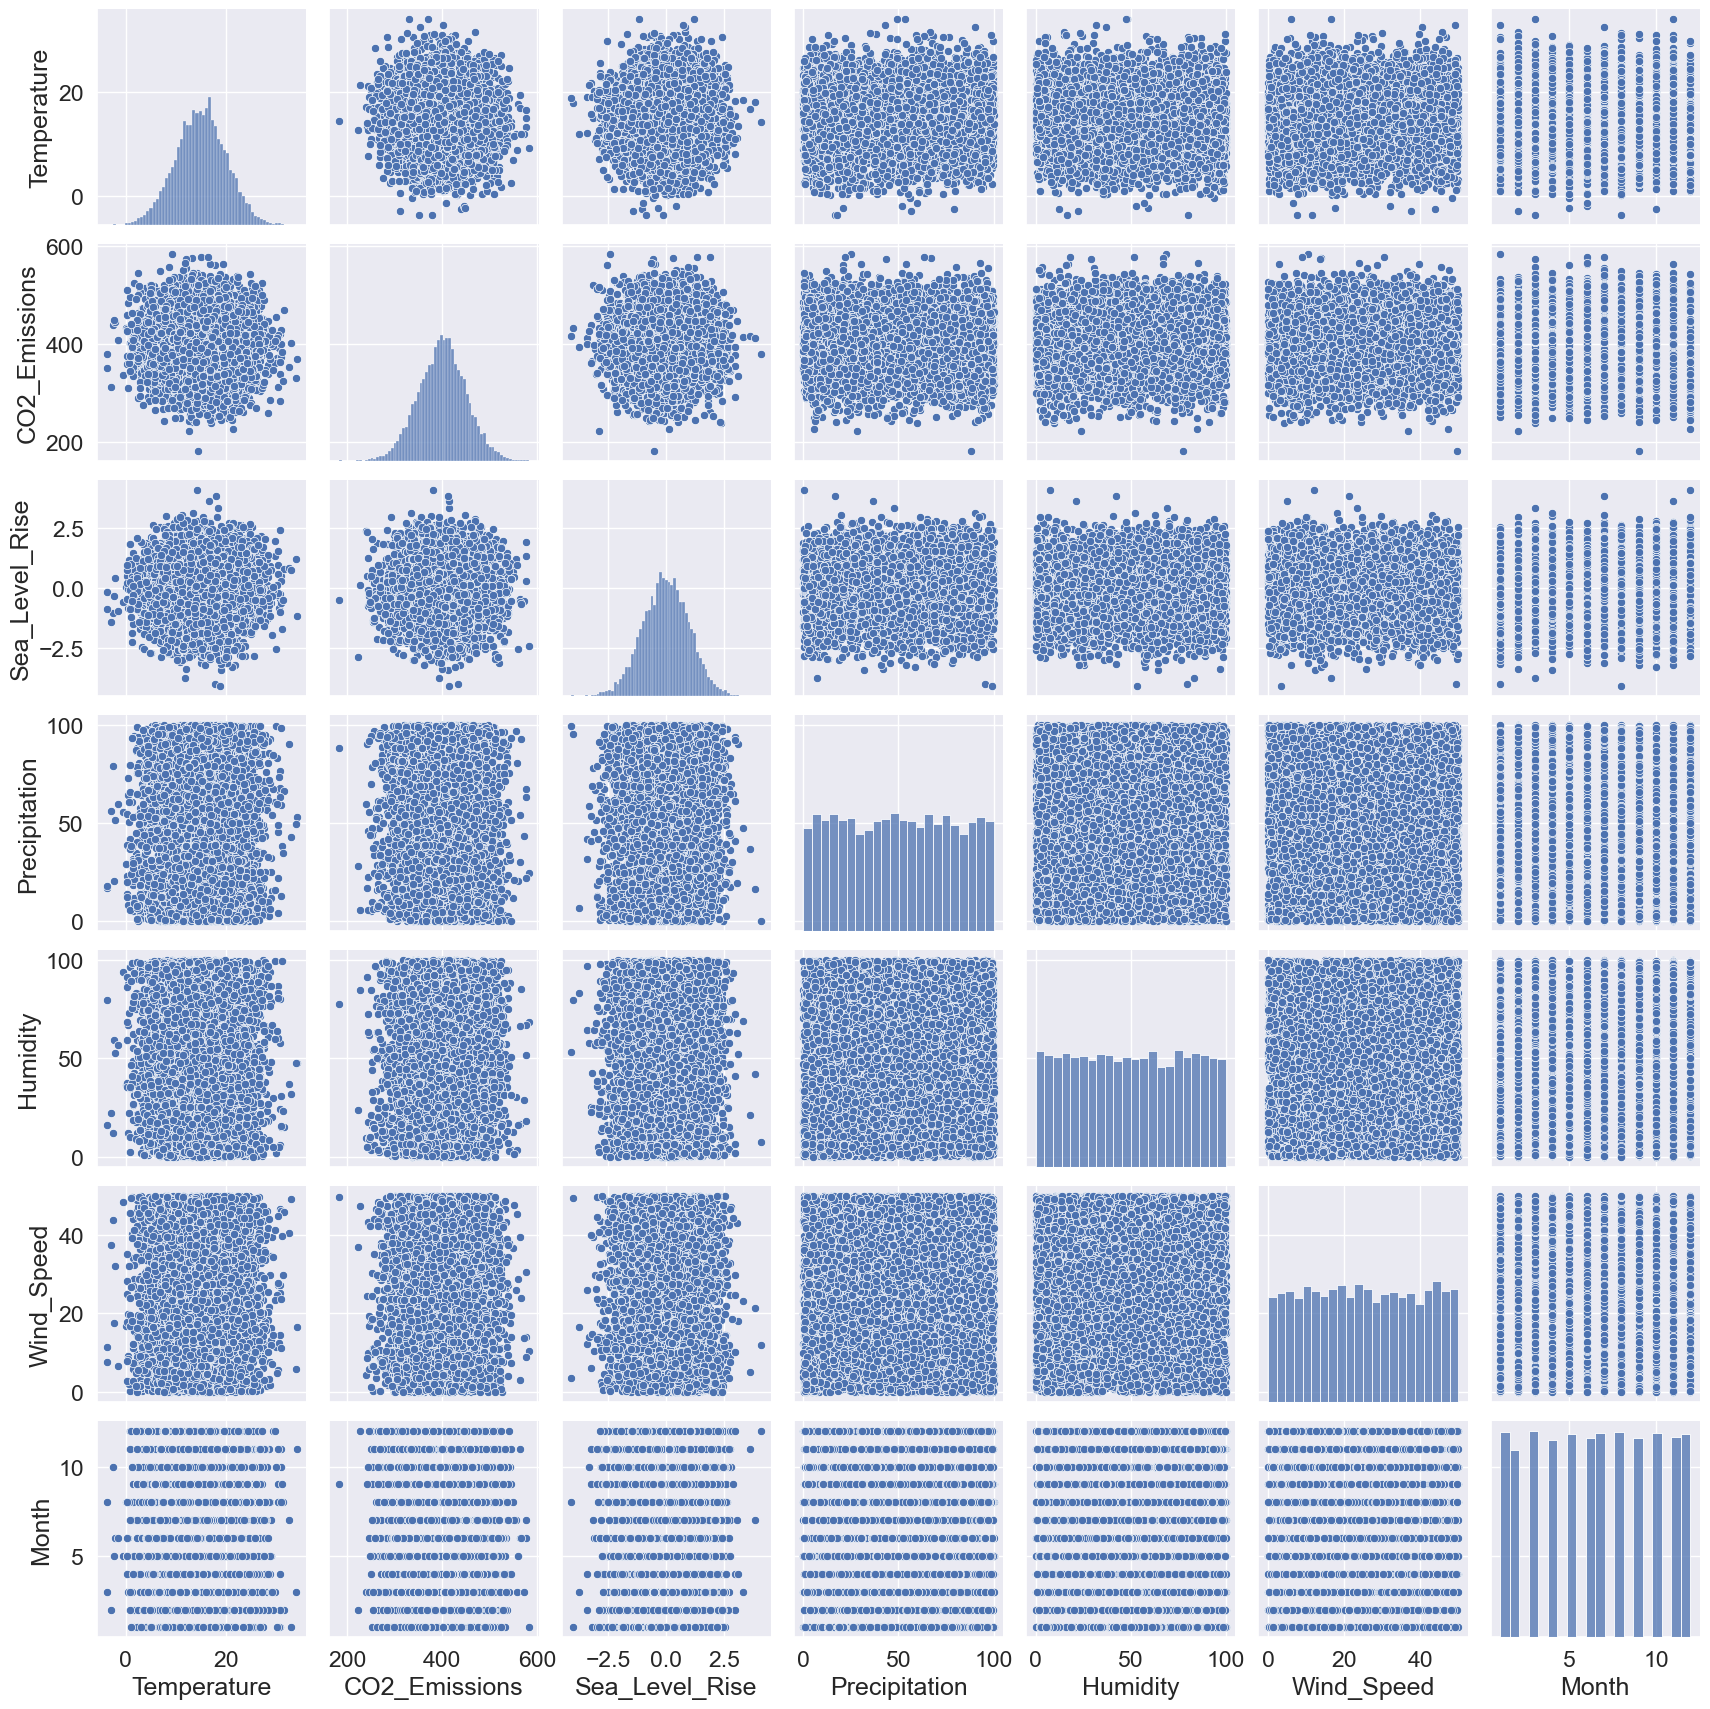

In [20]:
sns.pairplot(df)
plt.show()


C:\Users\19739\AppData\Local\Temp\ipykernel_12888\1055643998.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


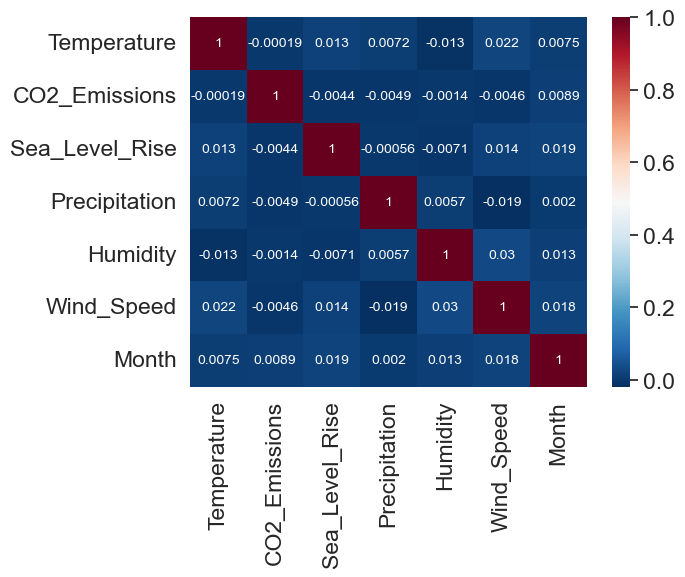

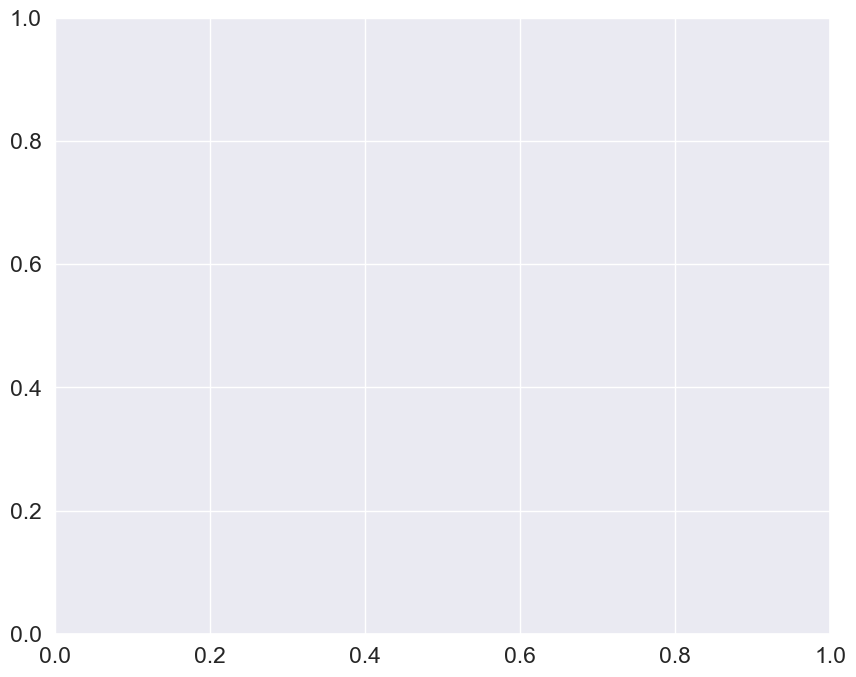

In [26]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', xticklabels=corr_matrix.columns, yticklabels=corr_matrix.columns, annot_kws={"size": 10})
plt.subplots(figsize=(10, 8))
plt.show()

#this also shows extremely weak correllations

## Create Your Model

Use the two columns with the strongest correlation to create and train your model. Make sure to print out the summary and plot the column values and the line produced by the model.

## Error Terms

Finally, plot your error terms!

## Summarize Your Work

Make notes of your answers to the questions below.

1. What was your R-squared value? 0.638
2. Based on your results, do you think a linear regression model was the best type of predictive analysis for your dataset?
3. Was your plot of the error terms a bell curve? 